In [1]:
import pandas as pd
import urllib
import numpy as np

In [2]:
from rdkit import Chem

In [3]:
github_repo = 'https://raw.githubusercontent.com/doylelab/rxnpredict/master/data_table.csv'

urllib.request.urlretrieve(github_repo, 'doyle.csv')

('doyle.csv', <http.client.HTTPMessage at 0x7faffaba95d0>)

In [4]:
df = pd.read_csv('doyle.csv')

In [5]:
df

,plate,row,col,base,base_cas_number,base_smiles,ligand,ligand_cas_number,ligand_smiles,aryl_halide_number,aryl_halide,aryl_halide_smiles,additive_number,additive,additive_smiles,product_smiles,yield
0,1,1,1,P2Et,165535-45-5,CN(C)P(N(C)C)(N(C)C)=NP(N(C)C)(N(C)C)=NCC,XPhos,564483-18-7,CC(C)C1=CC(C(C)C)=CC(C(C)C)=C1C2=C(P(C3CCCCC3)...,1.0,1-chloro-4-(trifluoromethyl)benzene,FC(F)(F)c1ccc(Cl)cc1,NaN,NaN,NaN,Cc1ccc(Nc2ccc(C(F)(F)F)cc2)cc1,26.888615
1,1,1,2,P2Et,165535-45-5,CN(C)P(N(C)C)(N(C)C)=NP(N(C)C)(N(C)C)=NCC,XPhos,564483-18-7,CC(C)C1=CC(C(C)C)=CC(C(C)C)=C1C2=C(P(C3CCCCC3)...,2.0,1-bromo-4-(trifluoromethyl)benzene,FC(F)(F)c1ccc(Br)cc1,NaN,NaN,NaN,Cc1ccc(Nc2ccc(C(F)(F)F)cc2)cc1,24.063224
2,1,1,3,P2Et,165535-45-5,CN(C)P(N(C)C)(N(C)C)=NP(N(C)C)(N(C)C)=NCC,XPhos,564483-18-7,CC(C)C1=CC(C(C)C)=CC(C(C)C)=C1C2=C(P(C3CCCCC3)...,3.0,1-iodo-4-(trifluoromethyl)benzene,FC(F)(F)c1ccc(I)cc1,NaN,NaN,NaN,Cc1ccc(Nc2ccc(C(F)(F)F)cc2)cc1,47.515821
3,1,1,4,P2Et,165535-45-5,CN(C)P(N(C)C)(N(C)C)=NP(N(C)C)(N(C)C)=NCC,XPhos,564483-18-7,CC(C)C1=CC(C(C)C)=CC(C(C)C)=C1C2=C(P(C3CCCCC3)...,4.0,1-chloro-4-methoxybenzene,COc1ccc(Cl)cc1,NaN,NaN,NaN,COc1ccc(Nc2ccc(C)cc2)cc1,2.126831
4,1,1,5,P2Et,165535-45-5,CN(C)P(N(C)C)(N(C)C)=NP(N(C)C)(N(C)C)=NCC,XPhos,564483-18-7,CC(C)C1=CC(C(C)C)=CC(C(C)C)=C1C2=C(P(C3CCCCC3)...,5.0,1-bromo-4-methoxybenzene,COc1ccc(Br)cc1,NaN,NaN,NaN,COc1ccc(Nc2ccc(C)cc2)cc1,47.586354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4594,3,32,44,MTBD,84030-20-6,CN1CCCN2CCCN=C12,AdBrettPhos,1160861-59-5,CC(C1=C(C2=C(OC)C=CC(OC)=C2P(C34CC5CC(C4)CC(C5...,12.0,2-iodopyridine,Ic1ccccn1,22.0,methyl-5-(thiophen-2-yl)isoxazole-3-carboxylate,COC(=O)c1cc(on1)c2sccc2,Cc1ccc(Nc2ccccn2)cc1,86.233157
4595,3,32,45,MTBD,84030-20-6,CN1CCCN2CCCN=C12,AdBrettPhos,1160861-59-5,CC(C1=C(C2=C(OC)C=CC(OC)=C2P(C34CC5CC(C4)CC(C5...,13.0,3-chloropyridine,Clc1cccnc1,22.0,methyl-5-(thiophen-2-yl)isoxazole-3-carboxylate,COC(=O)c1cc(on1)c2sccc2,Cc1ccc(Nc2cccnc2)cc1,1.440081
4596,3,32,46,MTBD,84030-20-6,CN1CCCN2CCCN=C12,AdBrettPhos,1160861-59-5,CC(C1=C(C2=C(OC)C=CC(OC)=C2P(C34CC5CC(C4)CC(C5...,14.0,3-bromopyridine,Brc1cccnc1,22.0,methyl-5-(thiophen-2-yl)isoxazole-3-carboxylate,COC(=O)c1cc(on1)c2sccc2,Cc1ccc(Nc2cccnc2)cc1,43.538365
4597,3,32,47,MTBD,84030-20-6,CN1CCCN2CCCN=C12,AdBrettPhos,1160861-59-5,CC(C1=C(C2=C(OC)C=CC(OC)=C2P(C34CC5CC(C4)CC(C5...,15.0,3-iodopyridine,Ic1cccnc1,22.0,methyl-5-(thiophen-2-yl)isoxazole-3-carboxylate,COC(=O)c1cc(on1)c2sccc2,Cc1ccc(Nc2cccnc2)cc1,69.795902


In [6]:
df.keys()

Index(['plate', 'row', 'col', 'base', 'base_cas_number', 'base_smiles',
       'ligand', 'ligand_cas_number', 'ligand_smiles', 'aryl_halide_number',
       'aryl_halide', 'aryl_halide_smiles', 'additive_number', 'additive',
       'additive_smiles', 'product_smiles', 'yield'],
      dtype='object')

In [8]:
df['additive'].unique()

array([nan, '5-phenylisoxazole', 'ethyl-3-methylisoxazole-5-carboxylate',
       'ethyl-5-methylisoxazole-3-carboxylate', '4-phenylisoxazole',
       '3-phenylisoxazole', '3-methylisoxazole',
       '5-Phenyl-1,2,4-oxadiazole', '5-methylisoxazole',
       'benzo[c]isoxazole', '3,5-dimethylisoxazole',
       'methyl-isoxazole-5-carboxylate', 'ethyl-isoxazole-3-carboxylate',
       'ethyl-5-methylisoxazole-4-carboxylate',
       'ethyl-isoxazole-4-carboxylate', 'benzo[d]isoxazole',
       'ethyl-3-methoxyisoxazole-5-carboxylate',
       '3-methyl-5-phenylisoxazole', 'N,N-dibenzylisoxazol-3-amine',
       'methyl-5-(furan-2-yl)isoxazole-3-carboxylate',
       '5-(2,6-difluorophenyl)isoxazole', 'N,N-dibenzylisoxazol-5-amine',
       '5-methyl-3-(1H-pyrrol-1-yl)isoxazole',
       'methyl-5-(thiophen-2-yl)isoxazole-3-carboxylate'], dtype=object)

In [13]:
df.loc[(df['base'] == 'BTMG') & (df['yield'] >= 20) & (pd.isna(df['additive'])) == True]

,plate,row,col,base,base_cas_number,base_smiles,ligand,ligand_cas_number,ligand_smiles,aryl_halide_number,aryl_halide,aryl_halide_smiles,additive_number,additive,additive_smiles,product_smiles,yield
16,1,1,17,BTMG,29166-72-1,CN(C)/C(N(C)C)=N\C(C)(C)C,XPhos,564483-18-7,CC(C)C1=CC(C(C)C)=CC(C(C)C)=C1C2=C(P(C3CCCCC3)...,1.0,1-chloro-4-(trifluoromethyl)benzene,FC(F)(F)c1ccc(Cl)cc1,NaN,NaN,NaN,Cc1ccc(Nc2ccc(C(F)(F)F)cc2)cc1,20.671717
17,1,1,18,BTMG,29166-72-1,CN(C)/C(N(C)C)=N\C(C)(C)C,XPhos,564483-18-7,CC(C)C1=CC(C(C)C)=CC(C(C)C)=C1C2=C(P(C3CCCCC3)...,2.0,1-bromo-4-(trifluoromethyl)benzene,FC(F)(F)c1ccc(Br)cc1,NaN,NaN,NaN,Cc1ccc(Nc2ccc(C(F)(F)F)cc2)cc1,37.065176
18,1,1,19,BTMG,29166-72-1,CN(C)/C(N(C)C)=N\C(C)(C)C,XPhos,564483-18-7,CC(C)C1=CC(C(C)C)=CC(C(C)C)=C1C2=C(P(C3CCCCC3)...,3.0,1-iodo-4-(trifluoromethyl)benzene,FC(F)(F)c1ccc(I)cc1,NaN,NaN,NaN,Cc1ccc(Nc2ccc(C(F)(F)F)cc2)cc1,40.108917
23,1,1,24,BTMG,29166-72-1,CN(C)/C(N(C)C)=N\C(C)(C)C,XPhos,564483-18-7,CC(C)C1=CC(C(C)C)=CC(C(C)C)=C1C2=C(P(C3CCCCC3)...,8.0,1-bromo-4-ethylbenzene,CCc1ccc(Br)cc1,NaN,NaN,NaN,CCc1ccc(Nc2ccc(C)cc2)cc1,34.705647
24,1,1,25,BTMG,29166-72-1,CN(C)/C(N(C)C)=N\C(C)(C)C,XPhos,564483-18-7,CC(C)C1=CC(C(C)C)=CC(C(C)C)=C1C2=C(P(C3CCCCC3)...,9.0,1-ethyl-4-iodobenzene,CCc1ccc(I)cc1,NaN,NaN,NaN,CCc1ccc(Nc2ccc(C)cc2)cc1,33.314294
25,1,1,26,BTMG,29166-72-1,CN(C)/C(N(C)C)=N\C(C)(C)C,XPhos,564483-18-7,CC(C)C1=CC(C(C)C)=CC(C(C)C)=C1C2=C(P(C3CCCCC3)...,10.0,2-chloropyridine,Clc1ccccn1,NaN,NaN,NaN,Cc1ccc(Nc2ccccn2)cc1,28.197374
26,1,1,27,BTMG,29166-72-1,CN(C)/C(N(C)C)=N\C(C)(C)C,XPhos,564483-18-7,CC(C)C1=CC(C(C)C)=CC(C(C)C)=C1C2=C(P(C3CCCCC3)...,11.0,2-bromopyridine,Brc1ccccn1,NaN,NaN,NaN,Cc1ccc(Nc2ccccn2)cc1,51.621909
27,1,1,28,BTMG,29166-72-1,CN(C)/C(N(C)C)=N\C(C)(C)C,XPhos,564483-18-7,CC(C)C1=CC(C(C)C)=CC(C(C)C)=C1C2=C(P(C3CCCCC3)...,12.0,2-iodopyridine,Ic1ccccn1,NaN,NaN,NaN,Cc1ccc(Nc2ccccn2)cc1,55.276371
29,1,1,30,BTMG,29166-72-1,CN(C)/C(N(C)C)=N\C(C)(C)C,XPhos,564483-18-7,CC(C)C1=CC(C(C)C)=CC(C(C)C)=C1C2=C(P(C3CCCCC3)...,14.0,3-bromopyridine,Brc1cccnc1,NaN,NaN,NaN,Cc1ccc(Nc2cccnc2)cc1,28.415223
30,1,1,31,BTMG,29166-72-1,CN(C)/C(N(C)C)=N\C(C)(C)C,XPhos,564483-18-7,CC(C)C1=CC(C(C)C)=CC(C(C)C)=C1C2=C(P(C3CCCCC3)...,15.0,3-iodopyridine,Ic1cccnc1,NaN,NaN,NaN,Cc1ccc(Nc2cccnc2)cc1,41.523397


In [14]:
additives = df['additive'].unique()

In [15]:
additives

array([nan, '5-phenylisoxazole', 'ethyl-3-methylisoxazole-5-carboxylate',
       'ethyl-5-methylisoxazole-3-carboxylate', '4-phenylisoxazole',
       '3-phenylisoxazole', '3-methylisoxazole',
       '5-Phenyl-1,2,4-oxadiazole', '5-methylisoxazole',
       'benzo[c]isoxazole', '3,5-dimethylisoxazole',
       'methyl-isoxazole-5-carboxylate', 'ethyl-isoxazole-3-carboxylate',
       'ethyl-5-methylisoxazole-4-carboxylate',
       'ethyl-isoxazole-4-carboxylate', 'benzo[d]isoxazole',
       'ethyl-3-methoxyisoxazole-5-carboxylate',
       '3-methyl-5-phenylisoxazole', 'N,N-dibenzylisoxazol-3-amine',
       'methyl-5-(furan-2-yl)isoxazole-3-carboxylate',
       '5-(2,6-difluorophenyl)isoxazole', 'N,N-dibenzylisoxazol-5-amine',
       '5-methyl-3-(1H-pyrrol-1-yl)isoxazole',
       'methyl-5-(thiophen-2-yl)isoxazole-3-carboxylate'], dtype=object)

nan
o1nccc1c2ccccc2


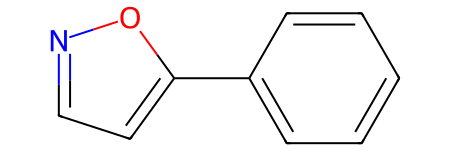

CCOC(=O)c1onc(C)c1


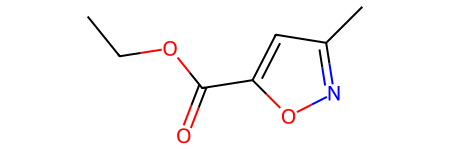

CCOC(=O)c1cc(C)on1


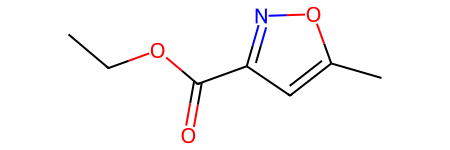

o1cc(cn1)c2ccccc2


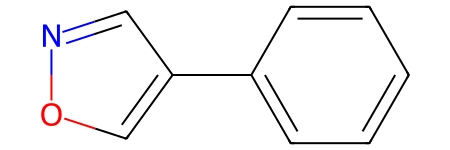

o1ccc(n1)c2ccccc2


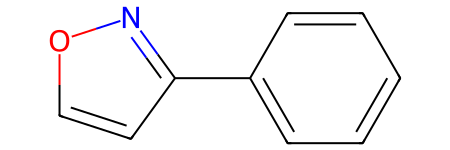

Cc1ccon1


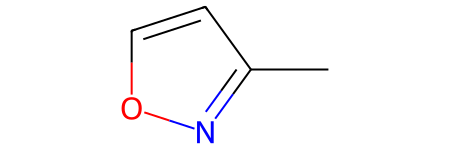

c1ccc(-c2ncno2)cc1


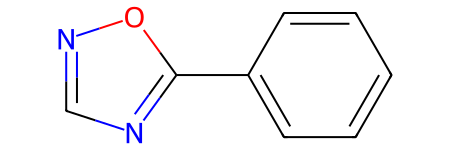

Cc1oncc1


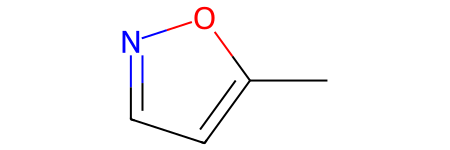

o1cc2ccccc2n1


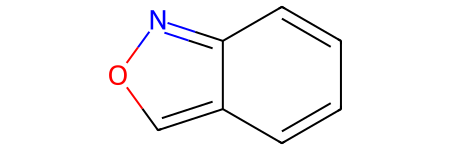

Cc1onc(C)c1


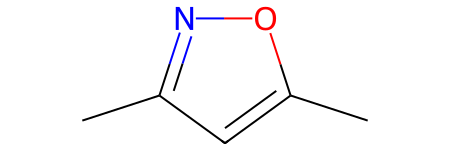

COC(=O)c1oncc1


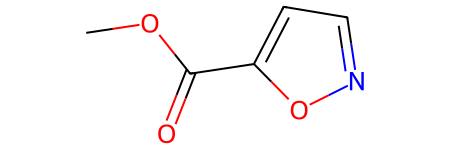

CCOC(=O)c1ccon1


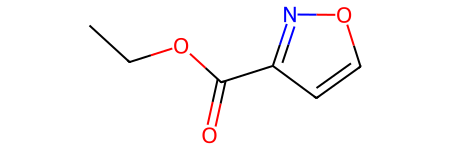

CCOC(=O)c1cnoc1C


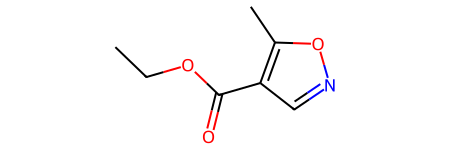

CCOC(=O)c1conc1


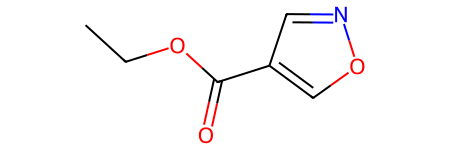

o1ncc2ccccc12


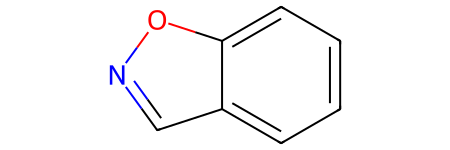

CCOC(=O)c1onc(OC)c1


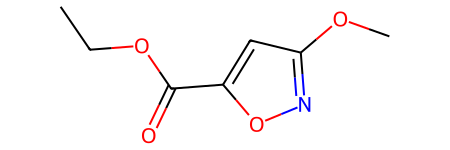

Cc1cc(on1)c2ccccc2


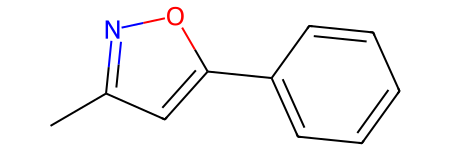

C(N(Cc1ccccc1)c2ccon2)c3ccccc3


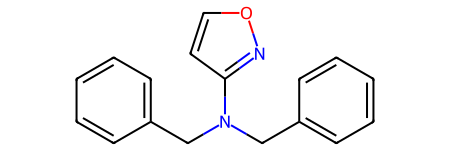

COC(=O)c1cc(on1)c2occc2


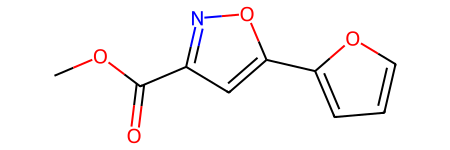

Fc1cccc(F)c1c2oncc2


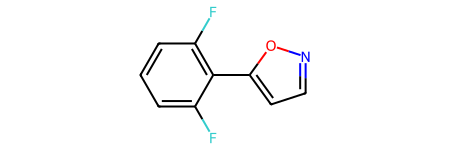

C(N(Cc1ccccc1)c2oncc2)c3ccccc3


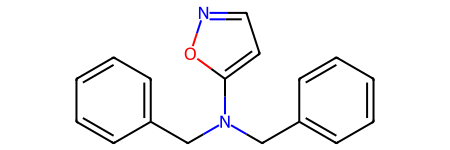

Cc1onc(c1)n2cccc2


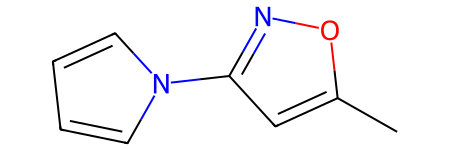

COC(=O)c1cc(on1)c2sccc2


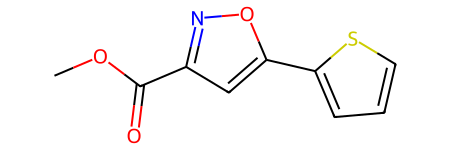

In [19]:
for s in df['additive_smiles'].unique():
    print(s)
    if pd.isna(s) == True:
        pass
    else:
        display(Chem.MolFromSmiles(s))